## **02-2) 데이터 전처리**

- 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.
- 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준 점수로 특성의 스케일을 변환하는 방법을 배운다.

### **용어 정리**
- **데이터 전처리**: 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계
- **표준점수**: 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나. 표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나눈다. 반드시 훈련세트의 평균과 표준편차로 테스트세트를 바꿔야 한다.
- **브로드캐스팅**: 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

### **넘파이로 데이터 준비하기**

이전에 파이썬 리스트를 순회하며 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성한 것과 달리 **넘파이**로 간편하게 만들어볼 것이다.

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

이번에는 넘파이를 이용해 타깃 데이터를 만들어보자.

In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### **사이킷런으로 훈련 세트와 테스트 세트 나누기**

이전에는 넘파이 배열의 인덱스를 직접 섞어 훈련 세트와 테스트 세트로 나눴었다.<br>
이번에는 **사이킷런의 train_test_split() 함수**를 사용해 나눠볼 것이다.<br>
이 함수는 전달되는 리스트나 배열을 알아서 섞은 뒤 비율에 맞게 훈련 세트와 테스트 세트로 나눠준다.


In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) # 랜덤 시드는 42로 지정
print(train_input.shape, test_input.shape) # 2차원 배열
print(train_target.shape, test_target.shape) # 1차원 배열 (튜플의 원소가 하나면 원소 뒤에 콤마가 추가됨)

(36, 2) (13, 2)
(36,) (13,)


도미와 빙어가 잘 섞였는지 테스트 데이터를 출력해보자.

In [9]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


원래 도미와 빙어의 비율은 35 : 14 = 2.5 : 1이지만 이 테스트 세스트의 비율은 3.3 : 1이다.  샘플링 현상이 조금 나타났다.<br>
이처럼 무작위로 데이터를 나눴을 때 샘플이 골고루 섞이지 않을 수 있다. <br>
<br>

**train_test_split() 함수**에 **stratify 매개변수**에 **타깃 데이터**를 전달하면 클래스 비율에 맞게 데이터를 나눈다.

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


빙어가 하나 늘어 이제 테스트 세트의 비율이 2.25:1이 되었다.<br>
(데이터가 작으면 전체 훈련 데이터의 비율과 동일하게 맞출 수 없기도 하다.)

### **수상한 도미 한 마리**

앞에서 준비한 데이터로 k-최근접 이웃을 훈련해볼 것이다.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

100%의 정확도가 나왔다.<br>
그러나 아래 데이터를 넣고 결과를 확인해보면, 도미가 아닌 빙어로 예측된다.

In [13]:
print(kn.predict([[25, 150]]))

[0.]


### **기준을 맞춰라**



그 이유는 두 특성(길이와 무게)의 스케일이 다르기 때문이다.<br>
데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 알고리즘이 k-최근접 이웃과 같이 거리 기반일 때 특히 그렇다.

#### **데이터 전처리**
샘플 간의 거리에 영향을 많이 받는 알고리즘을 제대로 사용하기 위해서는 특성값을 일정한 기준으로 맞춰주는 **데이터 전처리** 과정이 필요하다.

가장 널리 사용하는 전처리 방법 중 하나는 **표준점수(z점수)**이다.<br>
표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.<br>
이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

표준점수를 계산하는 방법은 **평균을 빼고 표준편차로 나눠주면** 된다.<br>
넘파이의 함수를 이용해서 평균과 표준편차를 계산해보자.

In [14]:
mean = np.mean(train_input, axis=0) # 평균, axis=0는 세로방향(행을 따라 각 열의 통계 값 계산)
std = np.std(train_input, axis=0) # 표준편차

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


이제 원본 데이터에서 평균을 빼고 표준편차로 나눠 표준점수로 변환할 것이다.<br>
아래와 같이 작성하면 넘파이의 **브로드캐스팅** 기능이 train_input의 모든 행에서 값을 계산해준다.

In [15]:
train_scaled = (train_input - mean) / std

### **전처리 데이터로 모델 훈련하기**

표준점수로 변환한 train_scaled와 수상한 도미 샘플로 산점도를 그려볼 것이다.

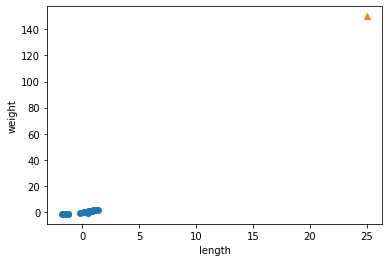

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그런데 또 예상과 다르다.<br>
수상한 도미 샘플 역시 동일한 비율로 변환해주지 않았기 때문이다.<br>
마찬가지로 훈련세트의 mean, std를 이용해서 변환해주자.

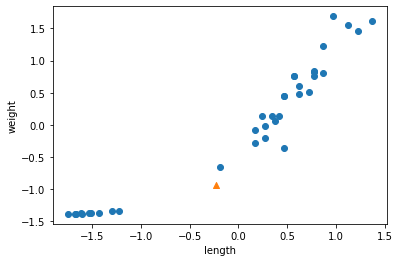

In [17]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이 그래프는 표준편차로 변환하기 전 산점도와 거의 동일하며, 크게 달라진 점은 x축과 y축의 범위가 -1.5~1.5 사이로 바뀌었다는 것이다.<br>
이제 이 데이터셋으로 k-최근접 이웃 모델을 다시 훈련해볼 것이다.

In [19]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

훈련을 마치고 테스트 세트로 평가할 때는 주의해야 할 점이 있다.<br>
테스트 세트도 훈련 세트의 평균과 표준편차로 변환해야 한다는 것이다.<br>
그렇지 않으면 데이터의 스케일이 같아지지 않아서 훈련한 모델이 쓸모가 없게된다.

In [20]:
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

100%의 정확도가 나왔다. 모든 테스트 세트의 샘플을 완벽하게 분류했다.<br>
그럼 수상한 도미는 어떨지 다시 예측해보자.


In [21]:
print(kn.predict([new]))

[1.]


드디어 도미로 예측했다.<br>
<br>

이제 마지막으로 kneighbors()함수로 이 샘플의 k-최근접 이웃을 구한 다음 산점도로 그려 볼 것이다.

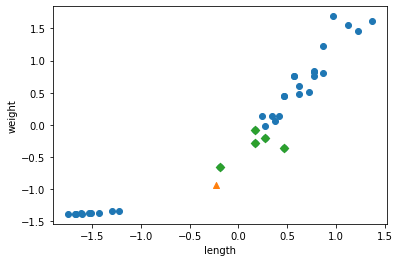

In [23]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

수상한 도미 샘플에서 가장 가까운 샘플이 모두 도미임을 알 수 있다. <br><br>
